In [87]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from bs4 import BeautifulSoup
from IPython.display import SVG
import time

In [88]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [89]:
from HelperFunctions import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
%matplotlib inline

In [91]:
data_dict = pickle.load(open('data_dict.p', 'rb'))
data = pd.read_csv('processed_data.csv')

data.dropna(inplace=True)
data.index = list(range(len(data.index)))

In [92]:
ignore = ['fips', 'year', 'county_name', 'state', 'total_votes', 'votes_dem', 
          'votes_rep']
predictors = [x for x in data.columns if x not in ignore]
voting_cols = ['total_votes', 'votes_dem', 'votes_rep']

In [93]:
data_12 = data[data.year == 2012]
data_16 = data[data.year == 2016]
data_16.index = list(range(len(data_16.index)))

In [94]:
vis_file = 'test.svg'

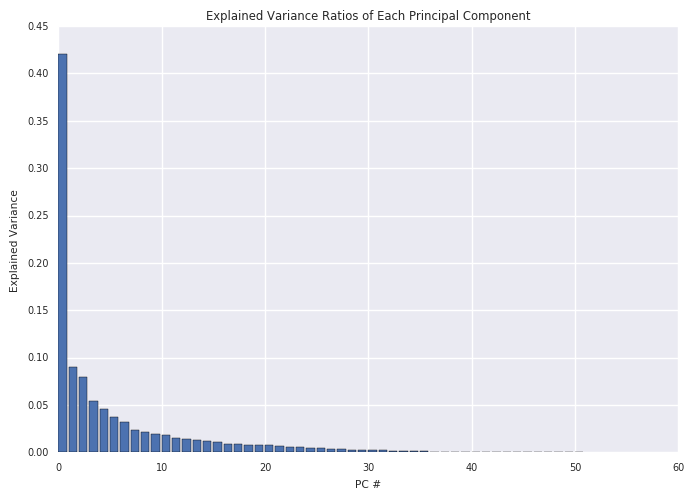

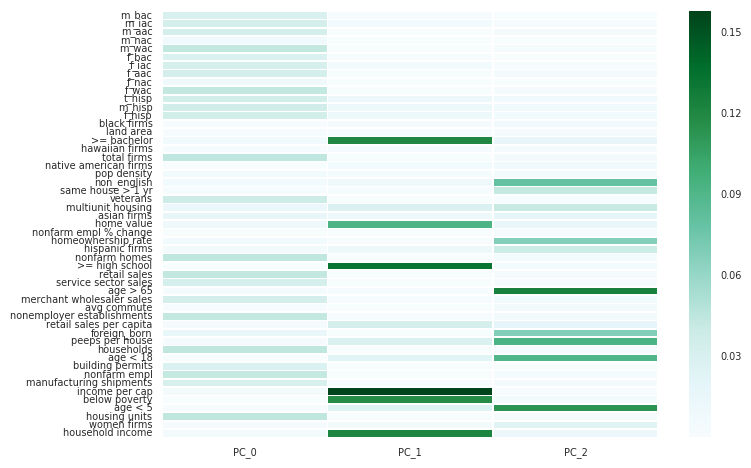

Most important features for each PC:
PC_0
households       0.044798
housing units    0.044592
total firms      0.044108
Name: PC_0, dtype: float64

PC_1
income per cap      0.158173
>= high school      0.133862
household income    0.122349
Name: PC_1, dtype: float64

PC_2
age > 65           0.125099
age < 5            0.113437
peeps per house    0.093280
Name: PC_2, dtype: float64

Cluster Voting Patterns
Cluster: 0
Mean R %: 0.626040625819
Mean d %: 0.356493595409
Cluster: 1
Mean R %: 0.356116706402
Mean d %: 0.628644886943
Cluster: 2
Mean R %: 0.574022985257
Mean d %: 0.408960099871
Cluster: 3
Mean R %: 0.421033990217
Mean d %: 0.563251711519
Cluster: 4
Mean R %: 0.288153932523
Mean d %: 0.68873732479
cluster fits 25636.2444936


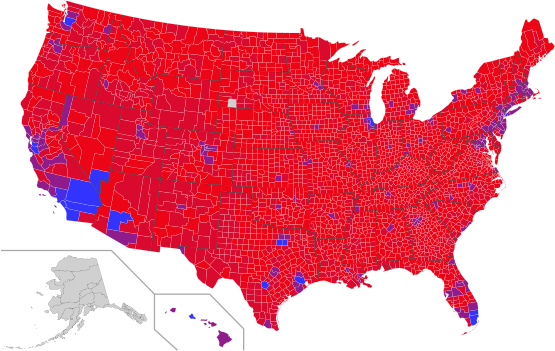

In [197]:
run_clustering_analysis(data_12, predictors, get_kmeans_clusters, 
                        vis_file, num_pc=3, num_clusters=5)
SVG(vis_file)

In [98]:
# run_clustering_analysis(data_16, predictors, get_kmeans_clusters, 
#                         vis_file, num_pc=3, num_clusters=3)
# SVG(vis_file)

## Exploring Demographic Shifts

In [176]:
dem_cols = ['bac', 'iac', 'aac', 'nac', 'wac']
dem_cols = ['m_' + x for x in dem_cols] + ['f_' + x for x in dem_cols]

In [177]:
data_voting = data[voting_cols + ['fips', 'year']]

In [178]:
data_voting['county_alignment'] = data_voting['votes_dem'] > data_voting['votes_rep']

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [179]:
data_voting['county_alignment'] = data_voting['county_alignment'].apply(
                                  lambda x: 'D' if x else 'R')

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [180]:
groups = data_voting.groupby('fips')
switched = groups.apply(lambda g_df: g_df.county_alignment.nunique() > 1)
switched = switched.reset_index().rename(columns={0: 'switched'})

In [181]:
data_voting = data_voting.merge(switched, on='fips')
data_voting = data_voting[data_voting.switched]

In [182]:
data_sw = data_voting.merge(data[dem_cols + ['fips', 'year']],
                               on=['fips', 'year'])

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


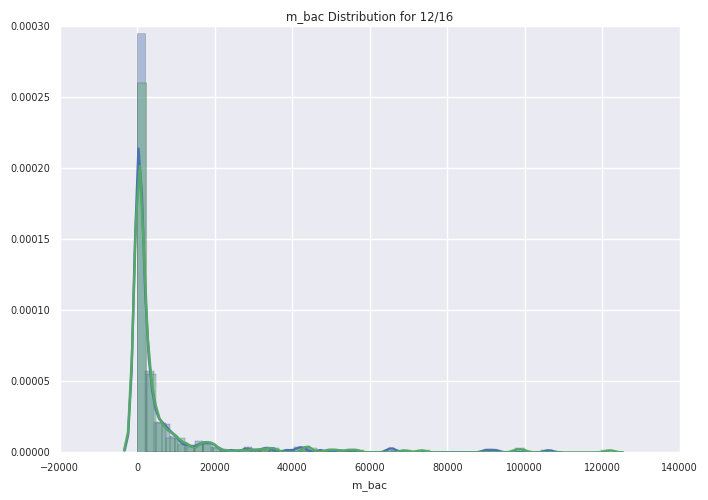

m_bac
2012 6314.61764706 106223
2016 6716.33613445 121998


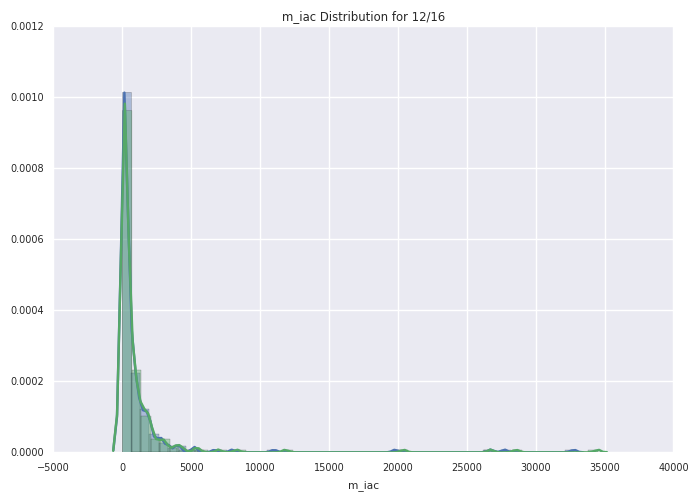

m_iac
2012 1191.76470588 32758
2016 1239.15546218 34500


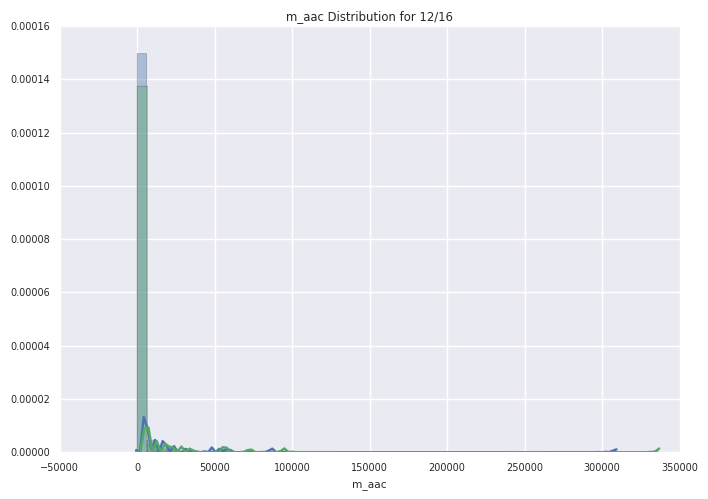

m_aac
2012 3663.67647059 308707
2016 4073.88235294 336188


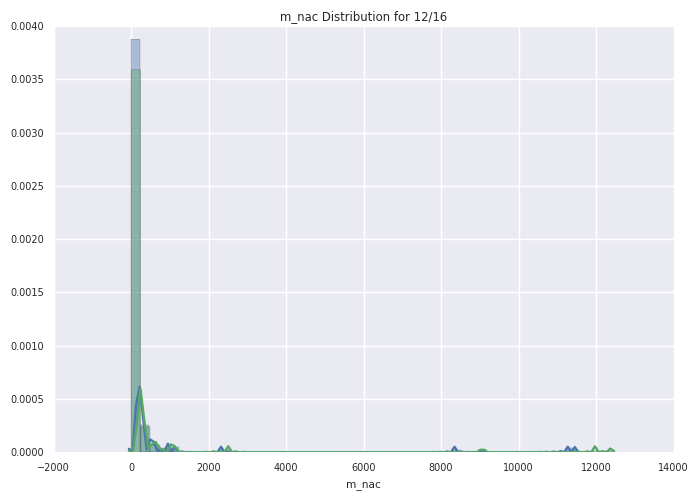

m_nac
2012 215.071428571 11488
2016 233.382352941 12408


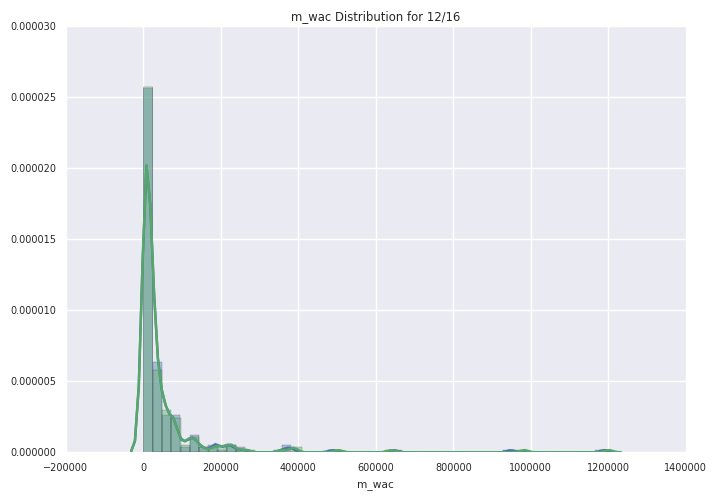

m_wac
2012 51537.6470588 1189735
2016 51950.5630252 1201072


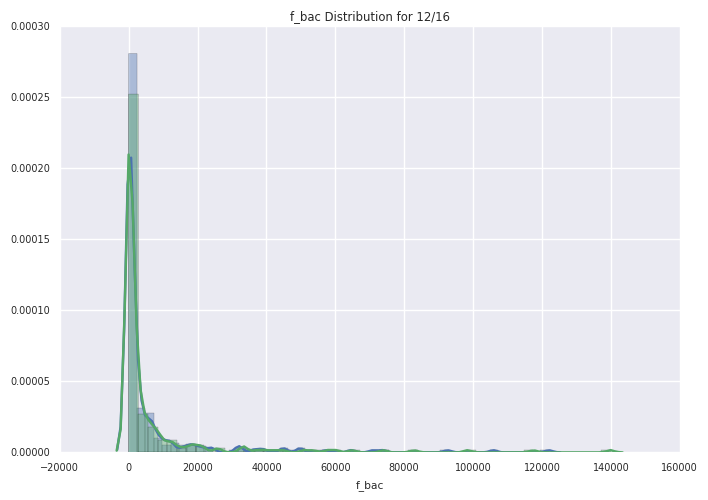

f_bac
2012 6601.67226891 121983
2016 7014.09663866 139935


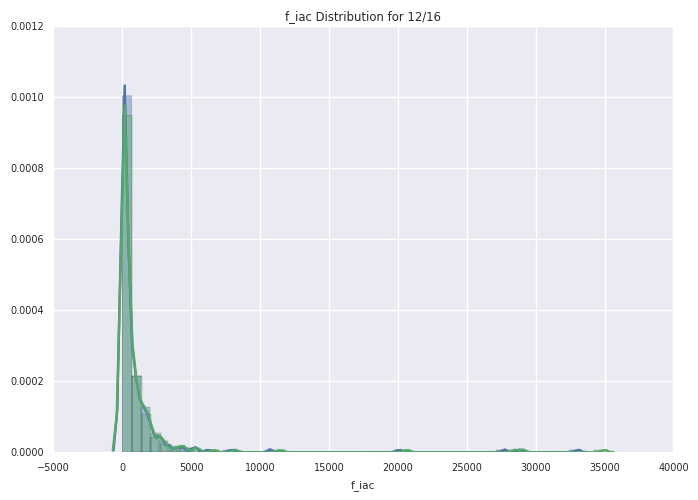

f_iac
2012 1200.49579832 33070
2016 1249.08403361 34963


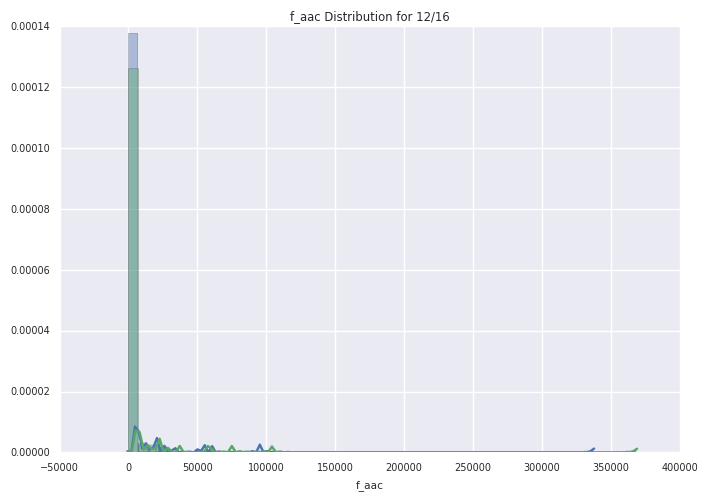

f_aac
2012 3938.12184874 337281
2016 4382.28571429 368433


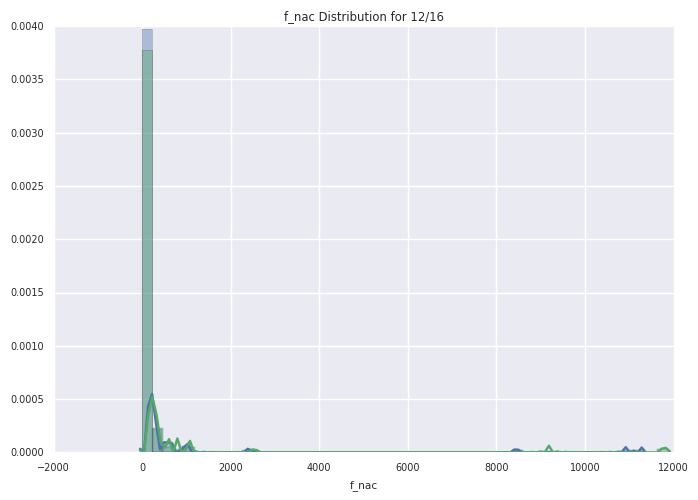

f_nac
2012 211.840336134 11323
2016 229.37394958 11865


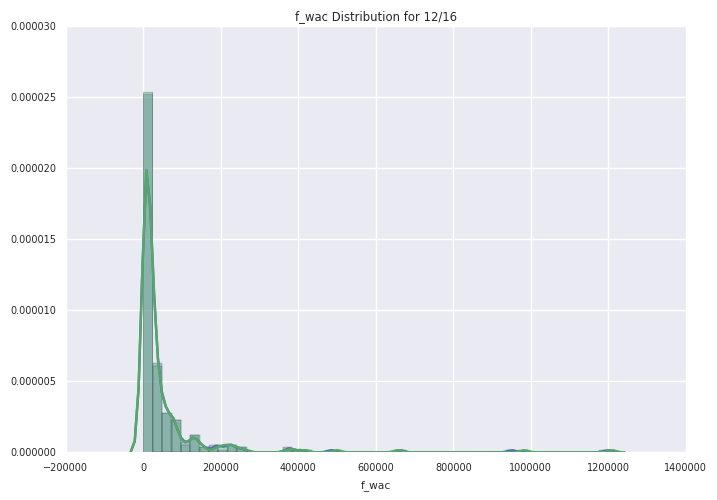

f_wac
2012 52458.8403361 1199827
2016 52800.8109244 1209894


In [194]:
for d in dem_cols:
    
    d_12 = data_sw.loc[data_sw.year == 2012, d]
    d_16 = data_sw.loc[data_sw.year == 2016, d]

    
    fig, ax = plt.subplots()
    ax.set_title(d + " Distribution for 12/16")
    sns.distplot(d_12)
    sns.distplot(d_16)
    
    plt.show()
    
    print(d)
    print('2012', d_12.mean(), d_12.max())
    print('2016', d_16.mean(), d_16.max())



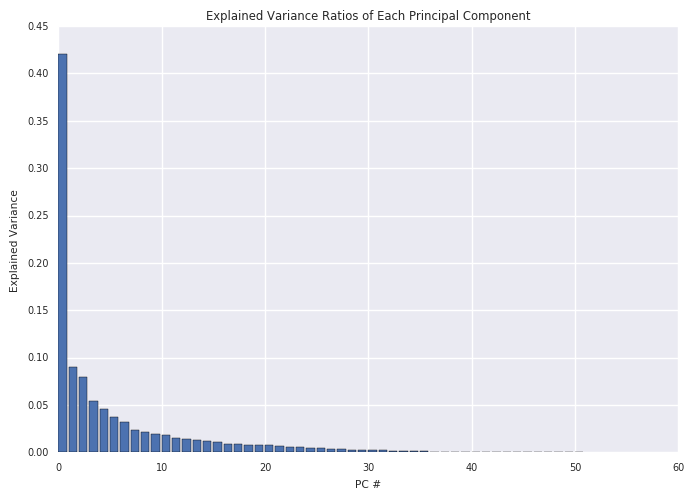

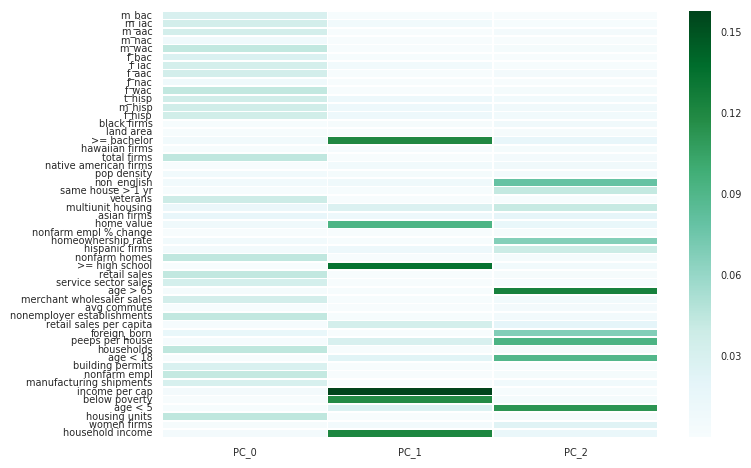

Most important features for each PC:
PC_0
households       0.044705
housing units    0.044511
total firms      0.043984
Name: PC_0, dtype: float64

PC_1
income per cap      0.158086
>= high school      0.134225
household income    0.121947
Name: PC_1, dtype: float64

PC_2
age > 65           0.124957
age < 5            0.112915
peeps per house    0.092733
Name: PC_2, dtype: float64



In [198]:
pc_df = run_pca(data, predictors, num_components=3)

In [202]:
fits = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i).fit(pc_df)
    fits.append(kmeans.inertia_)


In [203]:
fits

[187281.11712797519,
 118032.59925534486,
 86154.95014473921,
 65285.02699908569,
 51362.929428360396,
 40545.065102720226,
 34759.377165617996,
 29852.498093605205,
 26290.7946889661,
 23711.6758854857,
 21969.587015445788,
 20440.899479725882,
 19115.257912937905,
 18015.625239672248]

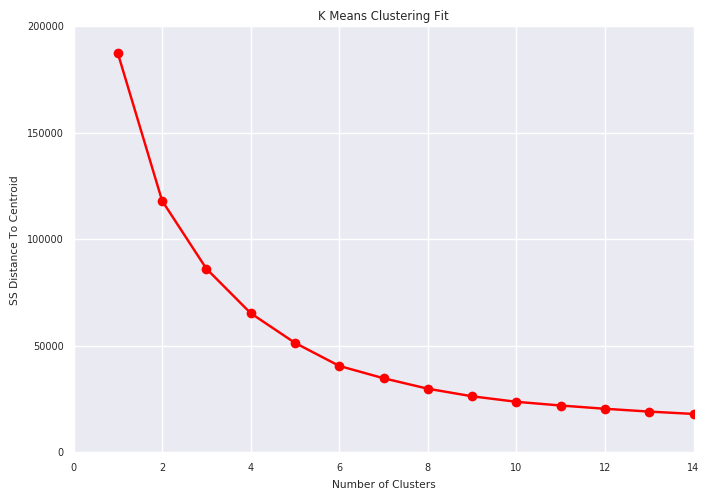

In [216]:
x = list(range(1,15))
plt.plot(x, fits, 'r-o')
plt.xlabel('Number of Clusters')
plt.ylabel('SS Distance To Centroid')
plt.title('K Means Clustering Fit')

In [215]:
len(x), len(fits)

(9, 14)

Index(['year', 'fips', 'county_name', 'state', 'm_bac', 'm_iac', 'm_aac',
       'm_nac', 'm_wac', 'f_bac', 'f_iac', 'f_aac', 'f_nac', 'f_wac', 't_hisp',
       'm_hisp', 'f_hisp', 'black firms', 'land area', '>= bachelor',
       'hawaiian firms', 'total firms', 'native american firms', 'pop density',
       'non_english', 'same house > 1 yr', 'veterans', 'multiunit housing',
       'asian firms', 'home value', 'nonfarm empl % change',
       'homeownership rate', 'hispanic firms', 'nonfarm homes',
       '>= high school', 'retail sales', 'service sector sales', 'age > 65',
       'merchant wholesaler sales', 'avg commute',
       'nonemployer establishments', 'retail sales per capita', 'foreign_born',
       'peeps per house', 'households', 'age < 18', 'building permits',
       'nonfarm empl', 'manufacturing shipments', 'income per cap',
       'below poverty', 'age < 5', 'housing units', 'women firms',
       'household income', 'total_votes', 'votes_dem', 'votes_rep'],
      dtype

In [228]:
dem_cols = ['m_bac',
             'm_iac',
             'm_aac',
             'm_nac',
             'm_wac',
             'f_bac',
             'f_iac',
             'f_aac',
             'f_nac',
             'f_wac', 
              'm_hisp', 
              'f_hisp']

In [229]:
counties = ['Riverside County', 'San Bernardino County', 'Alameda County']
df_sw = data[data.county_name.isin(counties)]


In [231]:
df_sw = df_sw[dem_cols + ['county_name', 'year']]